# Statistical tests

Recall that when you run the hypothesis test, if you get:
- A small p value ($p$<=$\alpha$), you should reject the null hypothesis $H_0$
- A large p value ($p$>$\alpha$), you should not reject the null hypothesis $H_0$

## The normality test

It checks whether or not a dataset has a normal distribution.

In [1]:
from scipy import stats
import numpy as np

# Example dataset
data = np.array([1.2, 2.5, 3.1, 4.0, 5.2, 6.1, 7.0, 8.5, 9.3, 10.2])

# Perform Shapiro-Wilk normality test
stat, p = stats.shapiro(data)

# Print test results
print('Shapiro-Wilk test statistic: %.3f' % stat)
print('p-value: %.3f' % p)

# Interpret test results
alpha = 0.05
if p > alpha:
    print('The data is likely normally distributed (fail to reject H0)')
else:
    print('The data is likely not normally distributed (reject H0)')


Shapiro-Wilk test statistic: 0.964
p-value: 0.835
The data is likely normally distributed (fail to reject H0)


## Pearson's correlation test

Checks whether two datasets have a linear relationship.

In [2]:
from scipy import stats
import numpy as np

# Example datasets
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 4, 6, 8, 16])

# Perform Pearson's correlation test
corr, p = stats.pearsonr(x, y)

# Print test results
print('Pearson correlation coefficient: %.3f' % corr)
print('p-value: %.3f' % p)

# Interpret test results
alpha = 0.05
if p > alpha:
    print('There is no significant correlation between x and y (fail to reject H0)')
else:
    print('There is a significant correlation between x and y (reject H0)')


Pearson correlation coefficient: 0.959
p-value: 0.010
There is a significant correlation between x and y (reject H0)


## The Spearman and Kendall's correlation test

These take into consideration if the data is related in rank (if the orders are related) instead of the numbers themselves.

In [3]:
from scipy import stats
import numpy as np

# Example datasets
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 4, 6, 8, 16])

# Perform Spearman's correlation test
rho, p = stats.spearmanr(x, y)

# Print test results
print('Spearman correlation coefficient: %.3f' % rho)
print('p-value: %.3f' % p)

# Interpret test results
alpha = 0.05
if p > alpha:
    print('There is no significant correlation between x and y (fail to reject H0)')
else:
    print('There is a significant correlation between x and y (reject H0)')

# Perform Kendall's correlation test
tau, p = stats.kendalltau(x, y)

# Print test results
print('Kendall correlation coefficient: %.3f' % tau)
print('p-value: %.3f' % p)

# Interpret test results
if p > alpha:
    print('There is no significant correlation between x and y (fail to reject H0)')
else:
    print('There is a significant correlation between x and y (reject H0)')


Spearman correlation coefficient: 1.000
p-value: 0.000
There is a significant correlation between x and y (reject H0)
Kendall correlation coefficient: 1.000
p-value: 0.017
There is a significant correlation between x and y (reject H0)


## Correlation with Pandas

Alternatively, we have the .corr() function in pandas, that allow us to compute the correlation coefficients by specifying method = 'pearson', 'kendall' or 'spearman', but unfortunately we cannot get the $p$-values with this function.



In [15]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame(data = load_wine().data, columns = load_wine().feature_names)

display(data)
data.corr(method = 'spearman').style.background_gradient(cmap='coolwarm')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.140430,0.243722,-0.306598,0.365503,0.310920,0.294740,-0.162207,0.192734,0.635425,-0.024203,0.103050,0.633580
malic_acid,0.140430,1.000000,0.230674,0.304069,0.080188,-0.280225,-0.325202,0.255236,-0.244825,0.290307,-0.560265,-0.255185,-0.057466
ash,0.243722,0.230674,1.000000,0.366374,0.361488,0.132193,0.078796,0.145583,0.024384,0.283047,-0.050183,-0.007500,0.253163
alcalinity_of_ash,-0.306598,0.304069,0.366374,1.000000,-0.169558,-0.376657,-0.443770,0.389390,-0.253695,-0.073776,-0.352507,-0.325890,-0.456090
magnesium,0.365503,0.080188,0.361488,-0.169558,1.000000,0.246417,0.233167,-0.236786,0.173647,0.357029,0.036095,0.056963,0.507575
total_phenols,0.310920,-0.280225,0.132193,-0.376657,0.246417,1.000000,0.879404,-0.448013,0.666689,0.011162,0.439457,0.687207,0.419470
flavanoids,0.294740,-0.325202,0.078796,-0.443770,0.233167,0.879404,1.000000,-0.543897,0.730322,-0.042910,0.535430,0.741533,0.429904
nonflavanoid_phenols,-0.162207,0.255236,0.145583,0.389390,-0.236786,-0.448013,-0.543897,1.000000,-0.384629,0.059639,-0.267813,-0.494950,-0.270112
proanthocyanins,0.192734,-0.244825,0.024384,-0.253695,0.173647,0.666689,0.730322,-0.384629,1.000000,-0.030947,0.342795,0.554031,0.308249
color_intensity,0.635425,0.290307,0.283047,-0.073776,0.357029,0.011162,-0.042910,0.059639,-0.030947,1.000000,-0.418522,-0.317516,0.457096


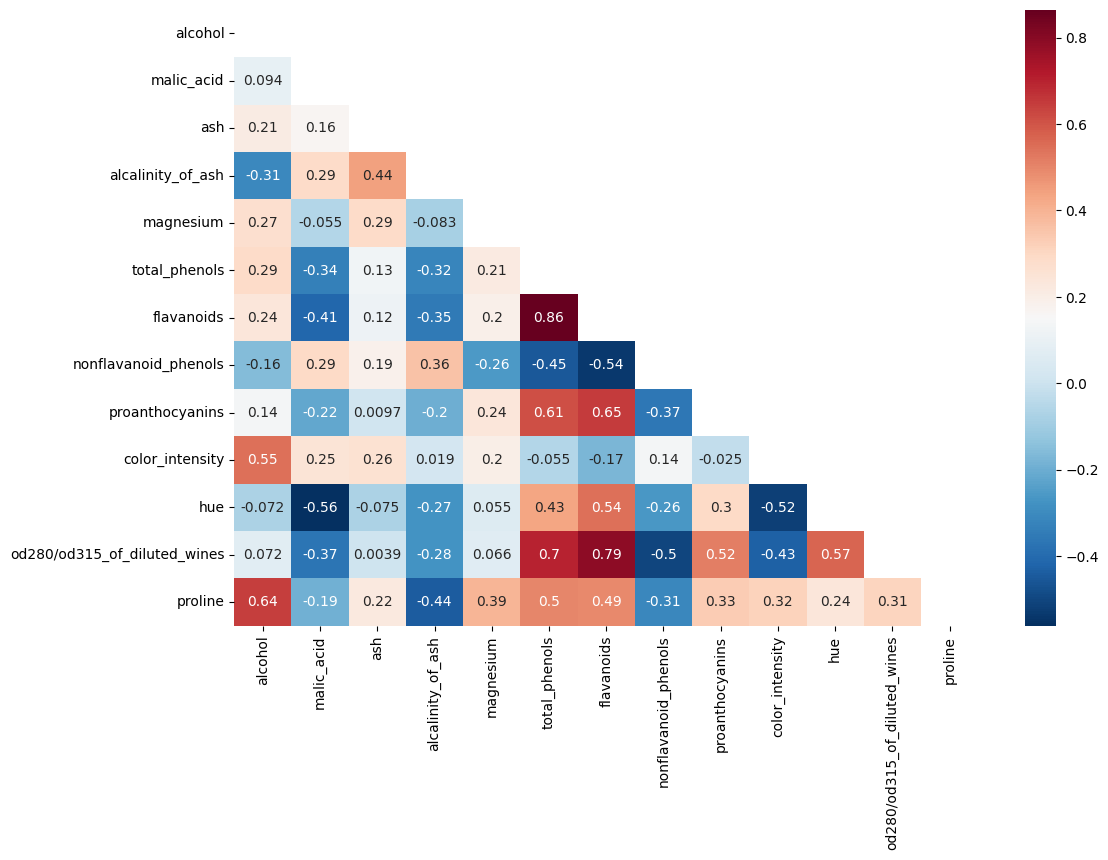

In [20]:
cor_mat = data.corr()
lower_triangle_mask = np.triu(np.ones(cor_mat.shape)).astype(bool)
cor_mat_lower = cor_mat.mask(lower_triangle_mask)

plt.figure(figsize = (12,8)) # <-- just sets the figure size 

sns.heatmap(cor_mat_lower, 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r');

## The Chi-Squared correlation test

The Pearson’s Chi-Square statistical hypothesis is a test for independence between categorical variables. 

**The Contingency Table**: A Contingency table (also called crosstab) is used in statistics to summarise the relationship between several categorical variables. Here, we take a table that shows the number of men and women buying different types of pets.

|   | Dog | Cat | Bird | Total |
|---|---------|---------|---------|---------|
| Men | 207 | 282 |	241	| 730 | 
| Women | 234 | 242 | 232 |	708|
| Total | 441 | 524 | 473 | 1438|

The aim of the test is to conclude whether the two variables( gender and choice of pet ) are related to each other.

Null hypothesis:
We start by defining the null hypothesis ($H_0$) which states that there is no relation between the variables. An alternate hypothesis would state that there is a *significant relation between the two*.


In [6]:
from scipy.stats import chi2_contingency
import pandas as pd

# defining the table
df = pd.DataFrame({'Gender' : ['M', 'M', 'M', 'F', 'F'] * 10,
                   'isSmoker' : ['Smoker', 'Smoker', 'Non-Smpoker', 'Non-Smpoker', 'Smoker'] * 10
                  })
display(df.head())

#define the contingency table
contigency = pd.crosstab(df['Gender'], df['isSmoker'])
display(contigency)

stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

,Gender,isSmoker
0,M,Smoker
1,M,Smoker
2,M,Non-Smpoker
3,F,Non-Smpoker
4,F,Smoker


isSmoker,Non-Smpoker,Smoker
Gender,,
F,10,10
M,10,20


p value is 2.7743145109015387e-121
Dependent (reject H0)


# t-tests vs z-tests

T-tests and Z-tests are both parametric statistical methods used to determine if there are significant differences between means, but they are applied under different conditions and have different assumptions.

Z-tests are typically used when:
- Sample size is large (usually n > 30). This size helps ensure that the sample mean distribution is normal by the Central Limit Theorem.
- Population variance is known, which is rare in practical scenarios, making Z-tests less common in real-world applications.
- They are often used for hypothesis testing concerning population proportions or mean differences when the aforementioned conditions are met.

T-tests, on the other hand, are used when:

- Population variance is unknown and has to be estimated from the sample data. This is a more common scenario in practical research.
- They can be applied with smaller sample sizes. Unlike the Z-test, the t-test does not require a strict sample size because it uses the Student's t-distribution, which adjusts for smaller sample sizes and becomes similar to the normal distribution as sample size increases.
- T-tests are versatile and can be used for comparing the means of one or two groups (one-sample, paired-sample, or independent two-sample t-tests).

In essence, the choice between a t-test and a Z-test often hinges on the size of the sample and whether the population variance is known. T-tests are more commonly used in practice due to their flexibility with unknown variances and smaller samples.


## Student's t-test

The t-test is the test of independence that checks whether two samples belong to the same population by considering a null hypothesis that their means are equal. This is a statistical test of hypothesis where the test statistic follows a Student’s t-distribution under the null hypothesis.

There are three types of t-test:

- One sample t-test: We use this test when there is a single sample and need a comparison between the population and sample to test whether the sample belongs to the given population.
- Two sample t-test: When there are two groups of samples and we want to compare them to find whether they belong to the same population then this test is implemented.
- Paired t-test: It is used when the samples are paired. For example, we are experimenting with a new exercise on people and we took samples of after and before effects of the exercise. Now we want to find out whether this exercise is beneficial or not. We will use paired t-tests to find out the differences because the samples are connected. But more on this on the next section.

In [7]:
from scipy import stats
import numpy as np

# Example datasets
sample1 = np.array([1, 2, 3, 4, 5])
sample2 = np.array([6, 7, 8, 9, 10])

# Perform Student t-test
t, p = stats.ttest_ind(sample1, sample2)

# Print test results
print('Student t-test statistic: %.3f' % t)
print('p-value: %.3f' % p)

# Interpret test results
alpha = 0.05
if p > alpha:
    print('The difference between the means of the two samples is not significant (fail to reject H0)')
else:
    print('The difference between the means of the two samples is significant (reject H0)')


Student t-test statistic: -5.000
p-value: 0.001
The difference between the means of the two samples is significant (reject H0)


In [8]:
import numpy as np
from scipy import stats

# Example data
data = np.array([102, 98, 101, 100, 99, 103, 97, 100, 101, 98])
population_mean = 100

# Two-tail t-test
t_stat, p_two_tail = stats.ttest_1samp(data, population_mean)
print(f"Two-tail test: t-statistic = {t_stat}, p-value = {p_two_tail}")

# One-tail t-test (testing if mean is greater)
t_stat, p_one_tail = stats.ttest_1samp(data, population_mean, alternative='greater')
print(f"One-tail test (greater): t-statistic = {t_stat}, p-value = {p_one_tail}")

# One-tail t-test (testing if mean is less)
t_stat, p_one_tail = stats.ttest_1samp(data, population_mean, alternative='less')
print(f"One-tail test (less): t-statistic = {t_stat}, p-value = {p_one_tail}")

Two-tail test: t-statistic = -0.16539535392598198, p-value = 0.872288363084041
One-tail test (greater): t-statistic = -0.16539535392598198, p-value = 0.5638558184579794
One-tail test (less): t-statistic = -0.16539535392598198, p-value = 0.4361441815420205


## Paired Student's t-test

This test is also known as the dependent sample t-test. It is a statistical concept and is used to check whether the mean difference between the two sets of observation is equal to zero.

**Example**:
Let us consider that we want to know whether an engine oil significantly impacts the car’s mileage of different brands. In order to test this, we have 10 cars in a garage doped with original engine oil initially. We have noted their mileage for 100 kilometers each. Then, we have each of the cars doped with another engine oil (different from the original one). Then, the mileage of the cars is calculated for 100 kilometers each. To compare the difference between the mean mileage of the first and second test, we use a paired samples t-test because for each car their first test score can be paired with their second test score. 

In [9]:
# pre holds the mileage before 
# applying the different engine oil
pre = [30, 31, 34, 40, 36, 35, 34, 30, 28, 29]
  
# post holds the mileage after 
# applying the different engine oil
post = [30, 31, 32, 38, 32, 31, 32, 29, 28, 30]
  
# Performing the paired sample t-test
stats.ttest_rel(pre, post)

TtestResult(statistic=np.float64(2.584921310565987), pvalue=np.float64(0.029457853822895275), df=np.int64(9))

The paired samples t-test follows the null and alternative hypotheses:
- H0: It signifies that the mean pre-test and post-test scores are equal
- H1: It signifies that the mean pre-test and post-test scores are not equal

As the p-value comes out to be equal to 0.029 which is less than 0.05 hence we reject the null hypothesis. So, we have enough proof to claim that the true mean test score is different for cars before and after applying the different engine oil.

# One-sample Z-test

Suppose you want to test if the mean of a sample is different from a population mean. Let’s assume the population mean is 100, and you have sample data with an assumed population standard deviation.


In [10]:
import numpy as np
from statsmodels.stats.weightstats import ztest

# Example data
data = np.array([102, 98, 101, 100, 99, 103, 97, 100, 101, 98])

# Known population mean and sample standard deviation
population_mean = 100
population_std = 5

# Perform Z-test
z_stat, p_value = ztest(data, value=population_mean, alternative='two-sided', ddof=1.0)

print(f"Z-statistic: {z_stat}, P-value: {p_value}")

Z-statistic: -0.16539535392598198, P-value: 0.8686328103456179


# Two-sample Z-test for Independent Samples

This test is used when you have two independent samples and you want to determine if there is a significant difference between their means, given that the population variances are known.

In [11]:
import numpy as np
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW

# Sample data
data1 = np.array([102, 100, 101, 98, 105, 110])
data2 = np.array([95, 90, 93, 88, 87, 90])

# Create Descriptive Statistics Objects
d1 = DescrStatsW(data1)
d2 = DescrStatsW(data2)

# Perform Z-test
z_stat, p_value = CompareMeans(d1, d2).ztest_ind(usevar='pooled')

print(f"Z-statistic: {z_stat}, P-value: {p_value}")

Z-statistic: 5.696869666327984, P-value: 1.2202713895532234e-08


## ANOVA 

One-way ANOVA is a test that is used to find out whether there exists a statistically significant difference between the mean values of more than one group.
- H0 (null hypothesis): $μ_1 = ... = μ_k$ (It implies that the means of all the population are equal)
- H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest

Statement:


Researchers took 20 cars of the same to take part in a study. These cars are randomly doped with one of the four-engine oils and allowed to run freely for 100 kilometers each. At the end of the journey, the performance of each of the cars is noted. 

In [12]:
# Importing library
from scipy.stats import f_oneway
 
# Performance when each of the engine
# oil is applied
performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]
 
# Conduct the one-way ANOVA
f_oneway(performance1, performance2, performance3, performance4)


F_onewayResult(statistic=np.float64(4.625000000000002), pvalue=np.float64(0.01633645983978022))

Since the p-value is less than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the performance among four different engine oils. 

## Repeated measures ANOVA

Repeated measures ANOVA is used to find whether there is a statistically significant difference exists between the means of three or more groups in which the same subjects displayed in each group. 

- The null hypothesis ($H_0$): $µ_1 = µ_2 = µ_3$ (In other words, population means are equal)
- The alternative hypothesis: ($H_1$): According to it, at least one population mean differs from the rest

**Example**:
Let us consider an example, researchers are curious to know if four different engine oils lead to different mileage of cars. In order to test this, they measured the mileage of 5 cars using four different engine oils. Since each car’s mileage is measured by applying each of the four-engine oils one by one so we can use a repeated-measures ANOVA to check if the mean reaction time differs between drugs. 

In [21]:
# Import library
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# Create the data
dataframe = pd.DataFrame({'Cars': np.repeat([1, 2, 3, 4, 5], 4),
                          'Oil': np.tile([1, 2, 3, 4], 5),
                          'Mileage': [36, 38, 30, 29,
                                      34, 38, 30, 29,
                                      34, 28, 38, 32,
                                      38, 34, 20, 44,
                                      26, 28, 34, 50]})

display(dataframe)

# Conduct the repeated measures ANOVA
print(AnovaRM(data=dataframe, depvar='Mileage',
              subject='Cars', within=['Oil']).fit())


,Cars,Oil,Mileage
0,1,1,36
1,1,2,38
2,1,3,30
3,1,4,29
4,2,1,34
5,2,2,38
6,2,3,30
7,2,4,29
8,3,1,34
9,3,2,28


              Anova
    F Value Num DF  Den DF Pr > F
---------------------------------
Oil  0.5679 3.0000 12.0000 0.6466



In this example, the F test-statistic comes out to be equal to 0.5679 and the corresponding p-value is 0.6466. Since this p-value is not less than 0.05, we cannot reject the null hypothesis and conclude that there is a not statistically significant difference in mean response times between the four-engine oils.

Congratulations! You have reached the end of statistical tests, hurray!!

![Joke](https://predictivehacks.com/wp-content/uploads/2020/12/1e3041cbac01fb863fbd2edfc6ae9236.jpg)